<center><h1>Analysis of Relationship between Consumer Price Index and Annual Income</h1></center>
<hr>

### Data Source(s)
- Annual CPI data, [link1](https://data.gov.sg/dataset/consumer-price-index-annual?view_id=c1e607a6-3b57-4d48-b38a-288a73df059a&amp;resource_id=88f3fe54-92b7-446e-bd58-a466058dcdca) (Retrieved on 29 Jul 2019)
- Annual Income data, [link2](https://data.gov.sg/dataset/income-of-individuals-by-income-type-annual) (Retrieved on 29 Jul 2019)
<hr>

### Executive Summary

#### Relevant libraries import: 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


# Read Data: 
# Read CPI csv file as cpi_df
cpi_df = pd.read_csv('annual_cpi.csv')

# Read Graduate Income csv file as income_df
inc_df = pd.read_csv('annual_inc.csv')

# Data Cleaning
cpi_df = cpi_df[['year','level_1','value']].convert_objects(convert_numeric=True) #convert the relevant columns to numerical dtype 
cpi_df.dropna(inplace = True)                                                     #drop "Nan" rows  
inc_df[['year_of_assessment','income_type','amount']].convert_objects(convert_numeric=True)

cpi_df.columns = cpi_df.columns.str.strip() # Remove white spaces
inc_df.columns = inc_df.columns.str.strip()

#V View data and their dtype 
print(cpi_df.head())
print(cpi_df.dtypes)
print(inc_df.head())
print(inc_df.dtypes)

    year    level_1   value
0   1961  All Items  24.524
4   1962  All Items  24.636
8   1963  All Items  25.159
12  1964  All Items  25.576
16  1965  All Items  25.641
year         int64
level_1     object
value      float64
dtype: object
   year_of_assessment                       income_type    amount
0                2004                         Dividends   3324172
1                2004                 Employment Income  62022432
2                2004  Income from Trade and Profession   4409580
3                2004                          Interest    211648
4                2004                       Other Types    902053
year_of_assessment     int64
income_type           object
amount                 int64
dtype: object


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Introduction (3 marks)
The Consumer Price Index (CPI) is the measure used to determine the weighted average prices of a basket of consumer goods and services, which is a useful measure to quantify the purchasing power of consumers (Chen, 2019). However, despite the slow overall inflation in Singapore, Singaporeans are still increasingly faced with the pressure from high cost of living (Tang, 2019).

So, this give rise to the question of whether singaporeans's income are keeping up with the rising cost. As such, it would be interesting for us to perform in-depth analysis of the relationship between the CPI and annual income to understand how closely correlated they are and the movement of this relationship across the years, in Singapore. 

### Problem Statement: 
To determine the relationship between Annual Income (Employment income) and CPI across the years.


## Methodology, Insights &amp; Evaluation (14 marks)

### Understanding our data: 
#### CPI data set (CSV file):
CPI data is available from 1961 to 2018.There are 4 different types of CPI values for each year, which are the following: 

    CPI Type 1: All items
    CPI Type 2: All items Less Imputed Rentals On Owner-Occupied Accommodation
    CPI Type 3: All Items Less Accommodation
    CPI Type 4: MAS Core Inflation Measure

We run a check for any invalid data values in our dataset and realised that there were a lot of N/A values for CPI Type 2 to 4. As such we used dropna function to remove the N/A values. With that we realise that most of the data available are from CPI Type 1 category. As such we extracted/filtered out by seting "All items" as the criteria. 

#### Annual Income data set (CSV file):
Annual Income data is available from 2004 to 2017. There are 8 different types of annual income for the year, being the following: 
    
    Income Type 1: Dividends
    Income Type 2: Employment Income
    Income Type 3: Income from Trade and Profession
    Income Type 4: Interest
    Income Type 5: Other Types
    Income Type 6: Rent
    Income Type 7: Rents/ Net Annual Value
    Income Type 8: Royalties

As the most common source income comes form Employment Income, we decided to focus on the the relationship between Annual Income under Employment income and the CPI on a yearly basis. 

As the common years of data between the 2 data set is only for year 2004 to 2007, we also applied extract data for only those years. We also merged the 2 dataframe into a single dataframe called df_all so that it can be used for regression analysis purpose. 

##### The extraction of data and merging of dataframe can be seen below: 

In [3]:
# Data filtering
all_items_cpi = cpi_df[(cpi_df['level_1'] == 'All Items')      # filter based on "All Items"
                       & (cpi_df['year']>=2004)                # filter for years 2004 to 2017
                       &(cpi_df['year']<=2017)]                # filter for years 2004 to 2017
employment_inc = inc_df[(inc_df['income_type'] == 'Employment Income')]   # filter for Income type: Employment

# Useful reference for merging 2 df into 1: https://datacarpentry.org/python-socialsci/11-joins/index.html

# Merging 2 dataframe into 1 dataframe:
df_all = pd.merge(all_items_cpi, employment_inc, how='inner', left_on = 'year', right_on = 'year_of_assessment')
df_all = df_all.drop(['year_of_assessment'], axis=1)  # drop "year_of_assessment" column since same detail as 'year'


#dislay first five rows
print(df_all)
print(df_all.describe())

    year    level_1   value        income_type     amount
0   2004  All Items  76.903  Employment Income   62022432
1   2005  All Items  77.263  Employment Income   62275153
2   2006  All Items  78.008  Employment Income   65932248
3   2007  All Items  79.650  Employment Income   74628627
4   2008  All Items  84.929  Employment Income   87331563
5   2009  All Items  85.436  Employment Income   98233219
6   2010  All Items  87.848  Employment Income   98454678
7   2011  All Items  92.458  Employment Income  110663416
8   2012  All Items  96.689  Employment Income  123622839
9   2013  All Items  98.969  Employment Income  133153378
10  2014  All Items  99.984  Employment Income  144047365
11  2015  All Items  99.461  Employment Income  155456464
12  2016  All Items  98.932  Employment Income  165399170
13  2017  All Items  99.502  Employment Income  171016265
            year      value        amount
count    14.0000  14.000000  1.400000e+01
mean   2010.5000  89.716571  1.108741e+08
std 

To analyse our data, we firstly plot a bar chart together with a line plot for both the employment income for the years from 2004 to 2017. This is so we can analyse the movement of of the total employment income compared to inflation(movement of CPI Index), whether it is keeping up or under performing. 

Text(0, 0.5, 'CPI Line plot')

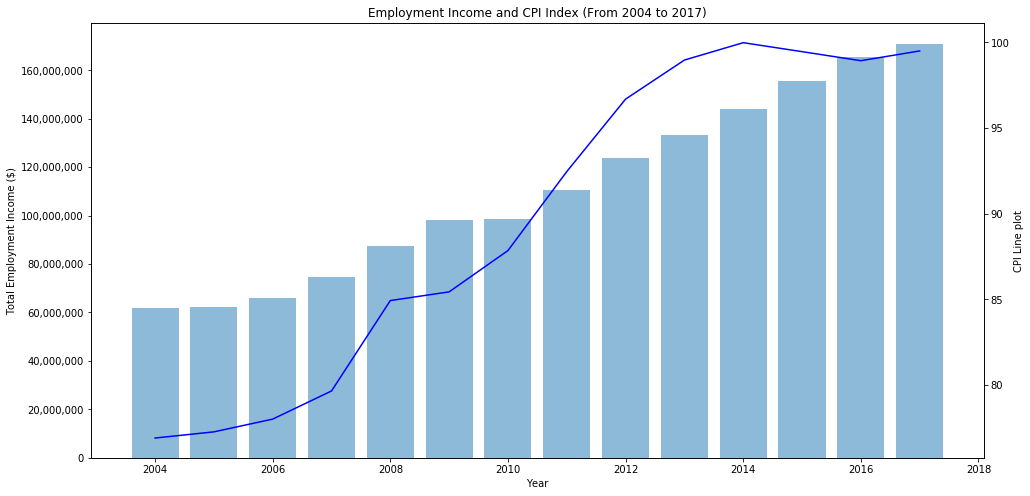

In [4]:
plt.figure(figsize=(16, 8)) 
ax1 = plt.bar(df_all['year'],df_all['amount'],align='center', alpha=0.5 ) #plotting of bar chart

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.ylabel('Total Employment Income ($)')
plt.xlabel("Year")
plt.title("Employment Income and CPI Index (From 2004 to 2017)")

ax2 = plt.twinx()
ax2.plot(df_all['year'], df_all['value'], color='b', label='line') #plotting of line graph
ax2.set_ylabel('CPI Line plot')


From 2014 to 2017, the total employment income for each year has steadily performed better compared to the CPI index except for 2011 to 2014 where the inflation rate increased at an increasing rate.  Although both total employment income and the CPI index have an increasing trend throughout the years, we can observe that the distance between the employment income and the CPI index is decreasing from 2012 to 2017. 


### Analysis: 
To gain an overview of the relationship between the 2 variables, we plot a scatter plot as the visualization tool to spot the whether there is a  relationship between Annual Income and the CPI, as shown below:

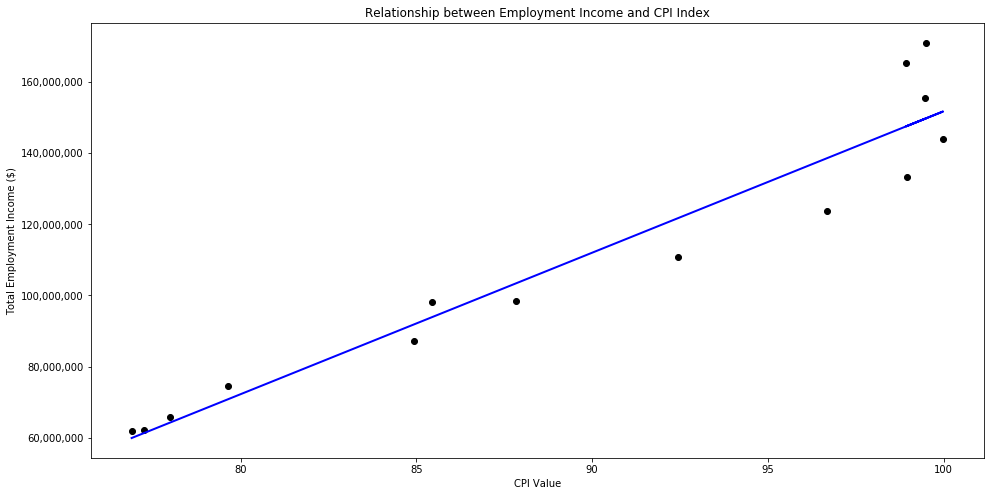

In [5]:
# Plot to see relationship
plt.figure(figsize=(16, 8))
X = df_all['value'].values.reshape(-1,1)
y = df_all['amount'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)

x = df_all['value']          # cpi as x axis
y = df_all['amount']         # income as y axis
plt.scatter(df_all['value'], 
            df_all['amount'], c='black')

plt.plot(
    df_all['value'],
    predictions,
    c='blue',
    linewidth=2
)    

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.xlabel("CPI Value")
plt.ylabel("Total Employment Income ($)")
plt.title("Relationship between Employment Income and CPI Index")

plt.show()

From the scatterplot, we can see a clear positive trend between the CPI Index value and the total employment income although there are a few points which deviates slightly from the overall trend. 

Next, to further understand the relationship between the two variables, we used Linear Regression Function to find the Simple Linear Regression model as shown below: 

In [6]:
# Finding Simple Linear Regression Model 

X = df_all['value'].values.reshape(-1,1)
y = df_all['amount'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

print('The linear model is: Y = ', round(reg.coef_[0][0],2) , "x", " - ",  -(round(reg.intercept_[0], 2)))

#note:
# reg.intercept
# reg.coef

The linear model is: Y =  3974975.26 x  -  245747093.85


Looking at the linear model, we can see that for every point increase in the CPI Index value would increase the total employment income by $3,974,975.26. 

In [8]:
# OLS Regression Results:

X = df_all['value']
y = df_all['amount']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

# reference: https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           5.34e-08
Time:                        21:42:52   Log-Likelihood:                -246.04
No. Observations:                  14   AIC:                             496.1
Df Residuals:                      12   BIC:                             497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.457e+08   3.01e+07     -8.156      0.0

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


High R-Square value between the CPI value and the Annual income variables may suggest that spending power and earnings are growing at a similar rate, and thus earnings would be able to meet the spending needs of the Singaporeans. On the other hand, low R-Square may suggest that spending power and earnings are not growing at a similar rate, and thus earnings may not be able to meet the spending needs of the Singaporeans. Based on the results of the OLS Regression Results, we can see that the R-Squared is high at 0.922. As such, this shows that the predictor variable (CPI value) is very accurate in predicting our outcome variable (Annual income), because 92% of the change in employment income can be explained by the change in CPI value. In addition to the strong predictor relationship, we can also see that the standard error is low in the model. Hence, it further supports that given that Annual Income and CPI are used as variables of the model, very low amount of error would be involved in prediction of Annual income using CPI. Thus, very accurate for our conclusion. 

## Executive Summary (3 marks)

As Singaporeans increasing face pressure from rising expenditure, we are keen to study if annual income is rising accordingly to satisfy the spending needs. By studying the relationship between CPI and the annual income, we hope to understand if the correlation between the 2 variables are strong, to conclude if the spending needs of Singaporeans are met with the growing income of Singaporeans. There are limitations on this analysis, such as the period for regression analysis and several NA values that impedes us from studying the relationship between different type of CPI value compared to the annual income of Singaporeans. All in all, the results obtain from this analysis suggests that Singaporean's income are growing at a rate relatively similar to that of the CPI, and thus expected to be sufficient to meet the growing cost of living. Our hypotheses is supported by other articles as well, as seen that the average annual income and the annual inflation rate increase by 2.4 percent and 2.2 percent a year, respectively (Yong, 2019). This is a comparative growth and as such, we believe that Singaporeans are provided with sufficient increase in income across the years to meet that spending needs. 

Reference: 

Chen, J. (2019, 27 Jul). Consumer Price Index – CPI. Retrieved from https://www.investopedia.com/terms/c/consumerpriceindex.asp

Tang, S, K. (2019, 13 Feb). Cost of living in Singapore: Slow overall inflation but some pressure points. CNA. Retrieved from https://www.channelnewsasia.com/news/singapore/cost-of-living-in-singapore-slow-inflation-some-price-pressures-11199680

Yong, R. A. (2019, 31 Jul). Household incomes, living standards have gone up in five years: Govt survey. The Straits Times. Retrieved from https://www.straitstimes.com/singapore/household-incomes-living-standards-have-gone-up-in-five-years-govt-survey?xtor=CS3-17&utm_source=STSmartphone&utm_medium=share&utm_term=2019-08-01+08%3A34%3A33

